# LSTM Model for Time Series Classification

In [1]:
import numpy as np
from keras import layers

In [2]:
from dataset_lstm import DatasetLSTM
from model_analysis import ModelAnalysis
from create_dataset import plot_signals_together

## **_Entraînement des modèles_**

## _Sans bruit_

Nombre de formes : 3000


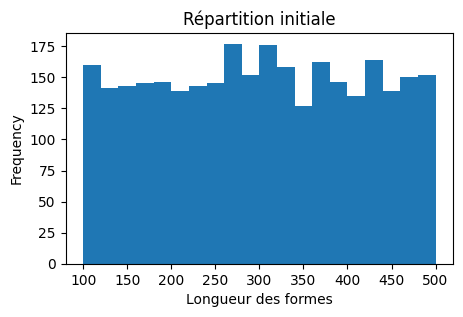

In [6]:
dataset_wn = DatasetLSTM(
	formsPerClass=500,
	noise_levels  = [0.0], 
	widths_list = [300],
	width_variation=[200]
).createDataFrame().pad_data()

print("Nombre de formes :", len(dataset_wn.df))
dataset_wn.plot_length_repartition()

In [7]:
dataset_wn.df.head()

,Form,Class,Noise_Level,N_Points,Padded_Form
0,"[0.0, 1.4391442180118465e-05, 2.93121870164424...",CLDR,0.0,466,"[0.0, 1.4391442180118465e-05, 2.93121870164424..."
1,"[0.0, 0.0008025616205616148, 0.001635097984288...",CLDR,0.0,238,"[0.0, 0.0008025616205616148, 0.001635097984288..."
2,"[0.0, 6.026540304925981e-05, 0.000122999620739...",CLDR,0.0,467,"[0.0, 6.026540304925981e-05, 0.000122999620739..."
3,"[0.0, 1.1172046903141656e-05, 2.28444267248097...",CLDR,0.0,387,"[0.0, 1.1172046903141656e-05, 2.28444267248097..."
4,"[0.0, 0.027479887542144466, 0.0553949239747936...",CLDR,0.0,290,"[0.0, 0.027479887542144466, 0.0553949239747936..."


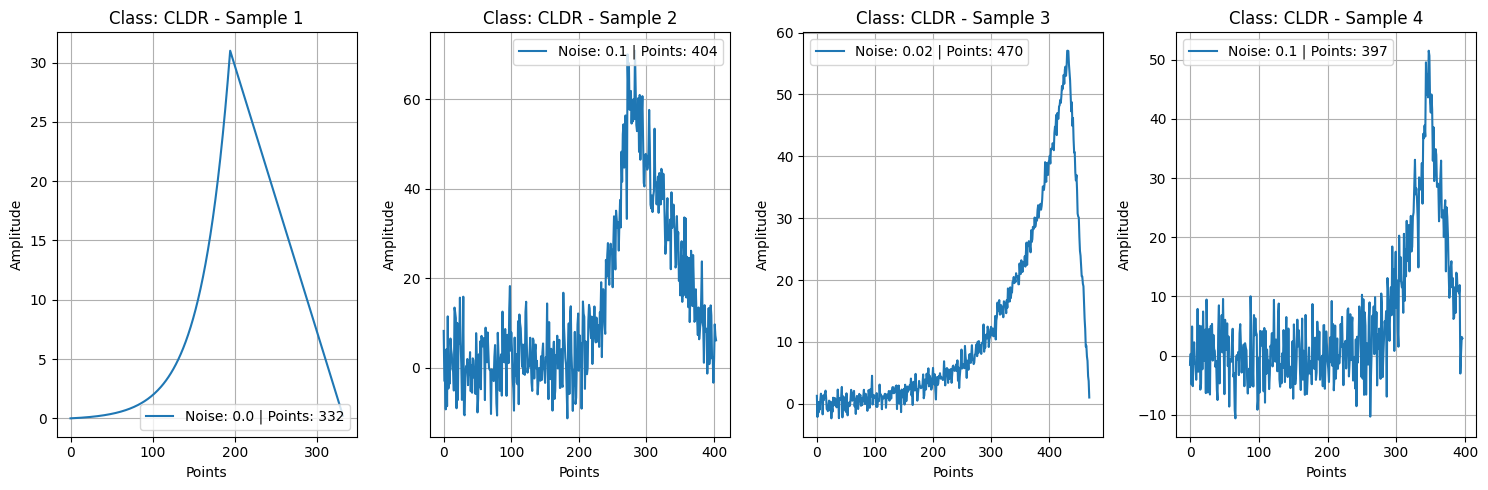

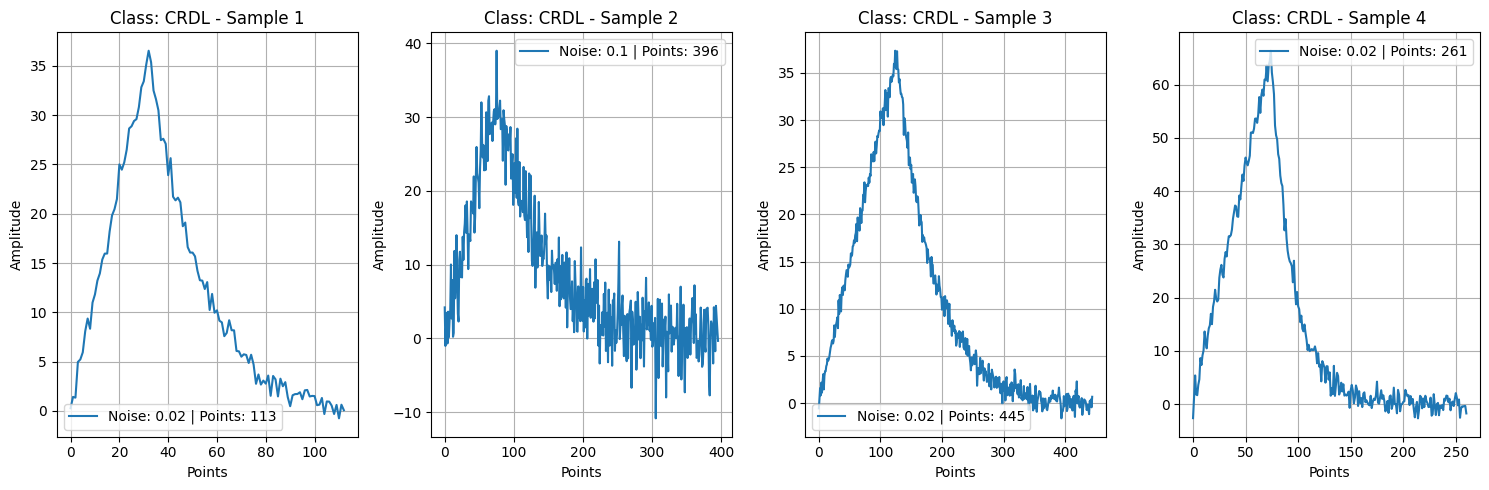

In [9]:
plot_signals_together(dataset_wn.df, 4)

Dimensions de X_train, y_train (70.00%) : (1750, 500, 1) (1750, 5)
Dimensions de X_test, y_test (15.00%) : (375, 500, 1) (375, 5)
Dimensions de X_val, y_val (15.00%) : (375, 500, 1) (375, 5)
Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 370ms/step - accuracy: 0.3498 - loss: 1.5454 - val_accuracy: 0.5520 - val_loss: 1.1273
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 417ms/step - accuracy: 0.5573 - loss: 1.0196 - val_accuracy: 0.5013 - val_loss: 1.0506
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 418ms/step - accuracy: 0.5211 - loss: 1.0280 - val_accuracy: 0.5947 - val_loss: 1.0188
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 367ms/step - accuracy: 0.5725 - loss: 0.9729 - val_accuracy: 0.5920 - val_loss: 0.8531
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.6495 - loss: 0.7815 - val_accuracy: 0.7573 - val_loss: 0.6177
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.7289 - loss: 0.5866 - val_accuracy: 0.7920 - val_loss: 0.5048
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━

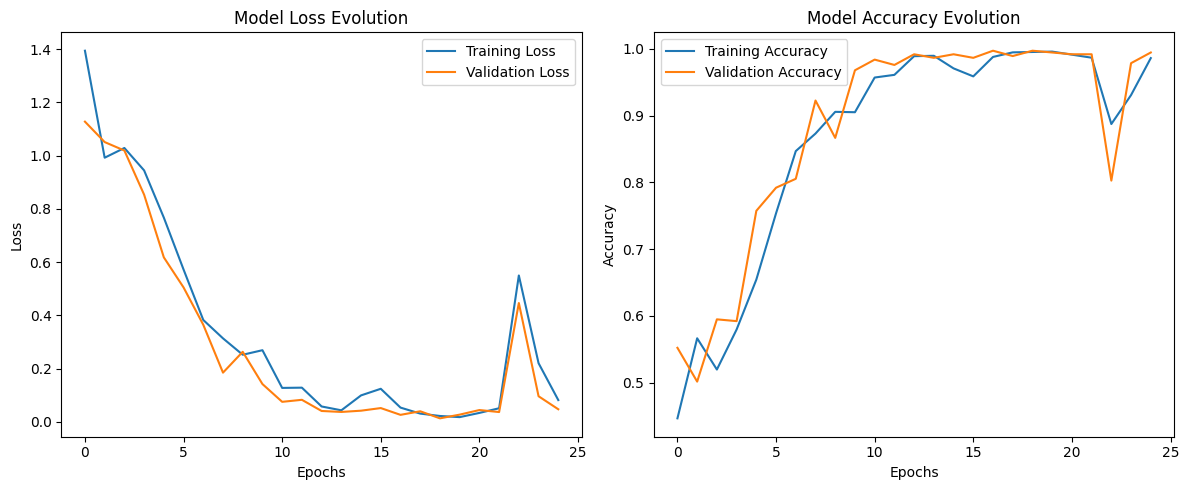

In [5]:
model_analysis_wn_1 = ModelAnalysis(dataset_wn.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1')
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_wn_1.evaluate("train")
model_analysis_wn_1.evaluate("val")

model_analysis_wn_1.plot_history()

In [ ]:
# Ajout de la couche Dense(32)
model_analysis_wn_2 = ModelAnalysis(dataset_wn.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1'),
		layers.Dense(units=32, activation='relu', name='Dense_1'),
		layers.Dropout(0.2, name='Dropout_Layer_2'),
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_wn_2.evaluate("train")
model_analysis_wn_2.evaluate("val")

model_analysis_wn_2.plot_history()

In [12]:
# Delete dataset to free memory
del dataset_wn

## _Bruit Faible_

In [ ]:
dataset_ln = DatasetLSTM(
	formsPerClass=500,
	noise_levels  = [0.02], 
	widths_list = [300],
	width_variation=[200]
).createDataFrame().pad_data()

print("Nombre de formes :", len(dataset_ln.df))
# dataset_ln.plot_length_repartition()

In [ ]:
model_analysis_ln_1 = ModelAnalysis(dataset_ln.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1')
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_ln_1.evaluate("train")
model_analysis_ln_1.evaluate("val")

model_analysis_ln_1.plot_history()

In [ ]:
# Ajout de la couche Dense(32)
model_analysis_ln_2 = ModelAnalysis(dataset_ln.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1'),
		layers.Dense(units=32, activation='relu', name='Dense_1'),
		layers.Dropout(0.2, name='Dropout_Layer_2'),
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_ln_2.evaluate("train")
model_analysis_ln_2.evaluate("val")

model_analysis_ln_2.plot_history()

In [ ]:
# Delete dataset to free memory
del dataset_ln

## _Bruit Fort_

In [ ]:
dataset_hn = DatasetLSTM(
	formsPerClass=500,
	noise_levels  = [0.1], 
	widths_list = [300],
	width_variation=[200]
).createDataFrame().pad_data()

print("Nombre de formes :", len(dataset_hn.df))
# dataset_hn.plot_length_repartition()

In [ ]:
model_analysis_hn_1 = ModelAnalysis(dataset_hn.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1')
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_hn_1.evaluate("train")
model_analysis_hn_1.evaluate("val")

model_analysis_hn_1.plot_history()

In [ ]:
# Ajout de la couche Dense(32)
model_analysis_hn_2 = ModelAnalysis(dataset_hn.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1'),
		layers.Dense(units=32, activation='relu', name='Dense_1'),
		layers.Dropout(0.2, name='Dropout_Layer_2'),
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_hn_2.evaluate("train")
model_analysis_hn_2.evaluate("val")

model_analysis_hn_2.plot_history()

In [ ]:
# Delete dataset to free memory
del dataset_hn

## _Bruits variés_

In [ ]:
dataset_an = DatasetLSTM(
	formsPerClass=200,
	noise_levels  = [0.0, 0.02, 0.1], 
	widths_list = [300],
	width_variation=[200]
).createDataFrame().pad_data()

print("Nombre de formes :", len(dataset_an.df))
# dataset_an.plot_length_repartition()

In [ ]:
model_analysis_an_1 = ModelAnalysis(dataset_an.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1')
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_an_1.evaluate("train")
model_analysis_an_1.evaluate("val")

model_analysis_an_1.plot_history()

In [ ]:
# Ajout de la couche Dense(32)
model_analysis_an_2 = ModelAnalysis(dataset_an.copy())\
	.prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
	.create_model(layers_list=[
		layers.Masking(mask_value=0, name='Masking_Layer'),
		layers.LSTM(units=64, return_sequences=False, name='LSTM'),
		layers.Dropout(0.2, name='Dropout_Layer_1'),
		layers.Dense(units=32, activation='relu', name='Dense_1'),
		layers.Dropout(0.2, name='Dropout_Layer_2'),
	], summary=False)\
	.train_model(epochs=25, batch_size=32)
	# .save_model('./models/lstm_model.keras')

model_analysis_an_2.evaluate("train")
model_analysis_an_2.evaluate("val")

model_analysis_an_2.plot_history()

In [ ]:
# Delete dataset to free memory
del dataset_an

## WaveNet

In [ ]:
#wavenet sans pooling
dataset_wn = DatasetLSTM(
    formsPerClass=500,
    noise_levels  = [1], 
    widths_list = [1000],
    width_variation=[200]
).createDataFrame().pad_data()

print("Nombre de formes :", len(dataset_wn.df))

model_analysis_wn_1 = ModelAnalysis(dataset_wn.copy())\
    .prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
    .create_model(layers_list=[
        layers.Conv1D(64, 4,dilation_rate=1, activation='relu', name='Conv1D_1'),
        layers.Conv1D(64, 4,dilation_rate=2, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=4, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=8, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=16, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=32, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4,dilation_rate=1, activation='relu', name='Conv1D_1'),
        layers.Conv1D(64, 4,dilation_rate=2, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=4, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=8, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=16, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=32, activation='relu', name='Conv1D_2'),
        layers.GlobalAveragePooling1D(name='GlobalAveragePooling1D'),
        layers.Dropout(0.2, name='Dropout_Layer_1'),
    ], summary=False)\
    .train_model(epochs=25, batch_size=32)

model_analysis_wn_1.evaluate("train")
model_analysis_wn_1.evaluate("val")

model_analysis_wn_1.plot_history()

In [ ]:
#wavenet avec pooling
dataset_wavenet1 = DatasetLSTM(
    formsPerClass=500,
    noise_levels  = [1], 
    widths_list = [10000],
    width_variation=[200]
).createDataFrame().pad_data()

print("Nombre de formes :", len(dataset_wavenet1.df))

model_analysis_wn_1 = ModelAnalysis(dataset_wavenet1.copy())\
    .prepare_data(train_size=0.7, test_size=0.15, print_info=True)\
    .create_model(layers_list=[
        layers.MaxPooling1D(10, name='MaxPooling1D'),
        layers.Conv1D(64, 4,dilation_rate=1, activation='relu', name='Conv1D_1'),
        layers.Conv1D(64, 4,dilation_rate=2, activation='relu', name='Conv1D_2'),
        layers.Conv1D(64, 4, dilation_rate=4, activation='relu'),
        layers.Conv1D(64, 4, dilation_rate=8, activation='relu'),
        layers.Conv1D(64, 4, dilation_rate=16, activation='relu'),
        layers.Conv1D(64, 4, dilation_rate=32, activation='relu'),
        layers.Conv1D(64, 4,dilation_rate=1, activation='relu'),
        layers.Conv1D(64, 4,dilation_rate=2, activation='relu'),
        layers.Conv1D(64, 4, dilation_rate=4, activation='relu'),
        layers.Conv1D(64, 4, dilation_rate=8, activation='relu'),
        layers.Conv1D(64, 4, dilation_rate=16, activation='relu'),
        layers.Conv1D(64, 4, dilation_rate=32, activation='relu'),
        layers.GlobalAveragePooling1D(name='GlobalAveragePooling1D'),
        layers.Dropout(0.2, name='Dropout_Layer_1'),
    ], summary=False)\
    .train_model(epochs=15, batch_size=32)


model_analysis_wn_1.evaluate("train")
model_analysis_wn_1.evaluate("val")

model_analysis_wn_1.plot_history()

## Validation

In [ ]:
# final_model_analysis = ModelAnalysis.load_model('./models/lstm_model.keras', "...")
final_model_analysis = model_analysis_an_1

In [ ]:
final_model_analysis.plot_confusion_matrix()

In [ ]:
final_model_analysis.predict_random_curves()

In [ ]:
final_model_analysis.plot_scores()

In [ ]:
final_model_analysis.plotErrors()